
#### **Morphological operations**

- Morphological operations are used to extract image components that are useful in the representation and description of region shape.
- It is typically performed on binary images.


**Different types of Morphological operations**

- The morphological operations we’ll be covering include:
  - Erosion
  - Dilation
  - Opening
  - Closing
  - Morphological gradient
  - Black hat
  - Top hat (also called "White hat")


### What are Morphological Operations?

Morphological operations are techniques used to process images based on their shapes. These operations are mostly applied to **binary images** (black and white) and help in cleaning up the image, removing noise, separating or connecting objects, and analyzing shapes.


### 🧰 Basic Morphological Operations:

#### 1. **Erosion**
- 🧽 Removes white pixels (foreground) from the edges.
- ❌ Makes the object **shrink**.
- ✅ Useful for:
  - Removing small white noise.
  - Detaching connected objects.

#### 2. **Dilation**
- 💥 Adds white pixels to the edges.
- ➕ Makes the object **grow**.
- ✅ Useful for:
  - Filling small holes inside the object.
  - Connecting nearby objects.



### 🧼 Combination Operations:

#### 3. **Opening (Erosion → Dilation)**
- 🧹 First shrinks, then grows the object.
- ✅ Useful for:
  - Removing small objects from the foreground.
  - Keeping the main object’s shape intact.

#### 4. **Closing (Dilation → Erosion)**
- 🧯 First grows, then shrinks the object.
- ✅ Useful for:
  - Filling small black holes inside objects.
  - Connecting broken parts of an object.



### ✨ Advanced Morphological Operations:

#### 5. **Morphological Gradient**
- 📏 Difference between Dilation and Erosion.
- ✅ Highlights the **edges** of objects.

#### 6. **Top Hat (White Hat)**
- 🔦 Original image – Opening.
- ✅ Shows **small bright areas** that are smaller than the structuring element.
- ✅ Good for enhancing white details.

#### 7. **Black Hat**
- 🌑 Closing – Original image.
- ✅ Shows **small dark areas** on a bright background.
- ✅ Good for enhancing black details.





### 🧠 Summary:

| Operation        | Effect                     | Use Case                           |
|------------------|-----------------------------|-------------------------------------|
| Erosion          | Shrinks object              | Remove noise                       |
| Dilation         | Grows object                | Fill holes, connect parts          |
| Opening          | Erosion then Dilation       | Remove small white noise           |
| Closing          | Dilation then Erosion       | Fill gaps, close black holes       |
| Gradient         | Edge detection              | Find outlines                      |
| Top Hat          | Highlights bright features  | Detect small white objects         |
| Black Hat        | Highlights dark features    | Detect small black objects         |
!

In [ ]:
import cv2
import numpy as np 


img = cv2.imread("girl.jpg")
re_img = cv2.resize(img, (300, 450))

m = np.ones((5,5), np.int8)
er = cv2.erode(re_img, m, iterations=1)

cv2.imshow("Img", re_img)
cv2.imshow("er Img", er)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [4]:
import cv2
import numpy as np 


img = cv2.imread("phone.jpg")
re_img = cv2.resize(img, (300, 450))

m = np.ones((5,5), np.int8)
dl = cv2.dilate(re_img, m, iterations=1)

cv2.imshow("Img", re_img)
cv2.imshow("er Img", dl)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### Opening

In [7]:
import cv2
import numpy as np 


img = cv2.imread("sharma.png")
re_img = cv2.resize(img, (300, 450))

k = np.ones((10,10), np.int8)

op = cv2.morphologyEx(re_img, cv2.MORPH_OPEN,k, iterations=1)

cv2.imshow("Img", re_img)
cv2.imshow("er Img", op)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### Closing

In [ ]:
import cv2
import numpy as np 


img = cv2.imread("sharma.png")
re_img = cv2.resize(img, (300, 450))

k = np.ones((10,10), np.int8)

op = cv2.morphologyEx(re_img, cv2.MORPH_OPEN,k, iterations=1)

cv2.imshow("Img", re_img)
cv2.imshow("er Img", op)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [3]:
import cv2
import numpy as np

# Load and resize image
img = cv2.imread("morphology.png")
re_img = cv2.resize(img, (300, 450))
# Create a 5x5 kernel
m = np.ones((5,5), np.uint8)

# Perform all morphological operations
er = cv2.erode(re_img, m, iterations=1)                    # Erosion
dil = cv2.dilate(re_img, m, iterations=1)                  # Dilation
open_img = cv2.morphologyEx(re_img, cv2.MORPH_OPEN, m)     # Opening
close_img = cv2.morphologyEx(re_img, cv2.MORPH_CLOSE, m)   # Closing
grad = cv2.morphologyEx(re_img, cv2.MORPH_GRADIENT, m)     # Gradient
tophat = cv2.morphologyEx(re_img, cv2.MORPH_TOPHAT, m)     # Top Hat
blackhat = cv2.morphologyEx(re_img, cv2.MORPH_BLACKHAT, m) # Black Hat

# Create rows using hstack
row1 = np.hstack((re_img, er, dil))          # Original, Erosion, Dilation
row2 = np.hstack((open_img, close_img, grad)) # Opening, Closing, Gradient
row3 = np.hstack((tophat, blackhat, re_img))  # Top Hat, Black Hat, Original (repeated)

# Stack rows vertically
final_img = np.vstack((row1, row2, row3))

# Display the combined image
cv2.imshow("Morphological Operations", final_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

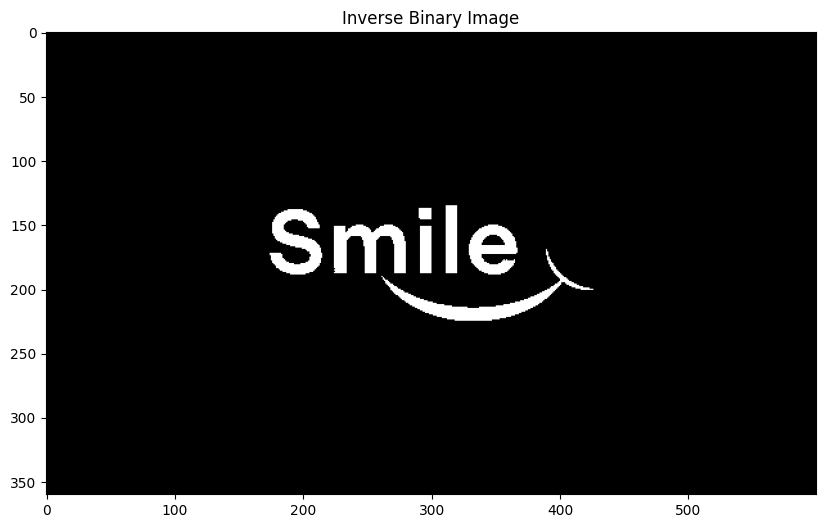

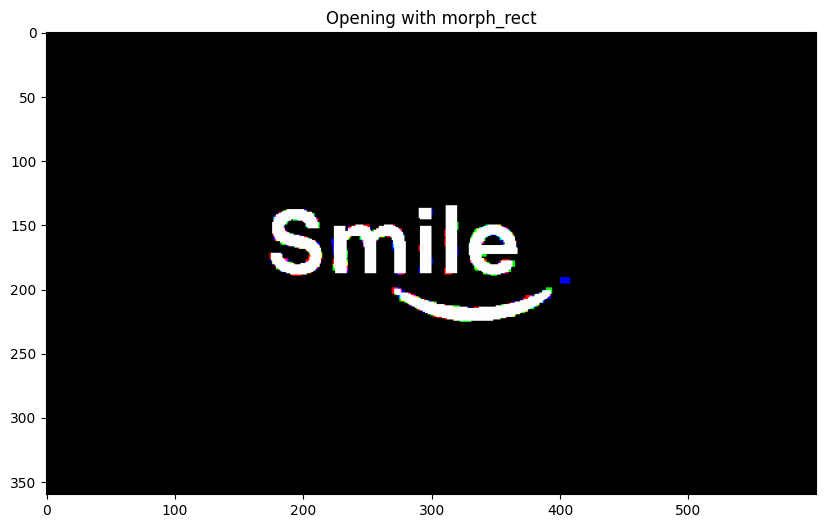

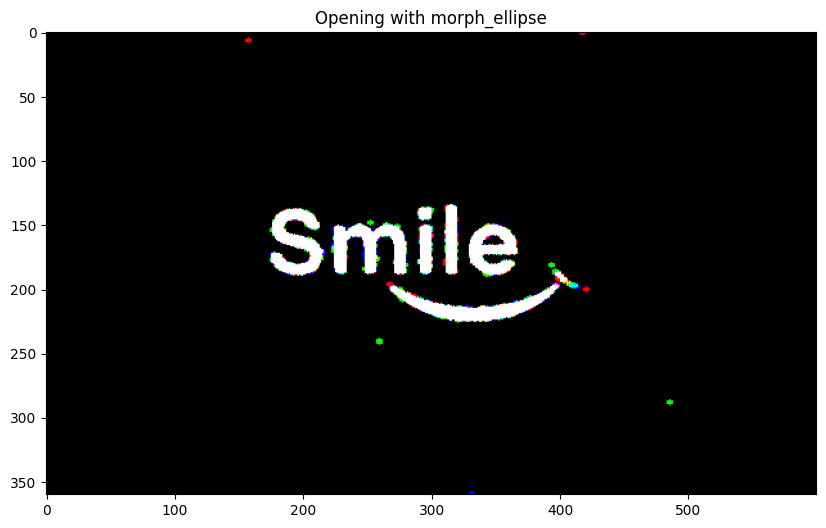

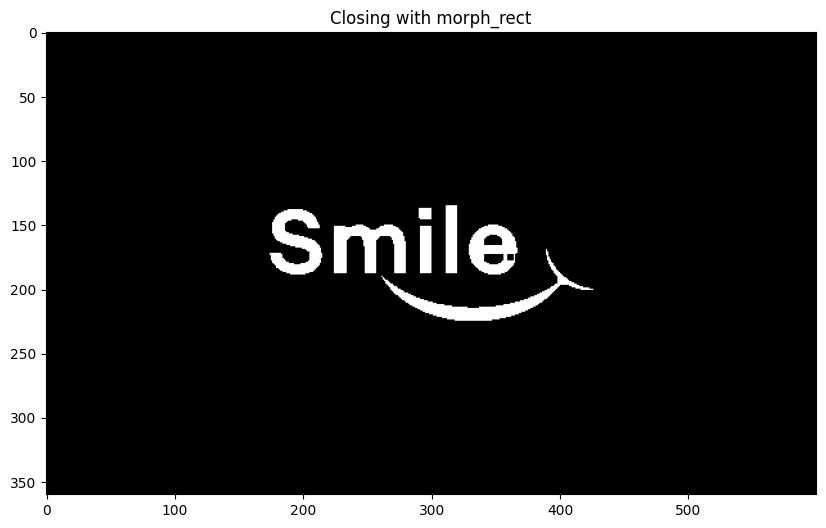

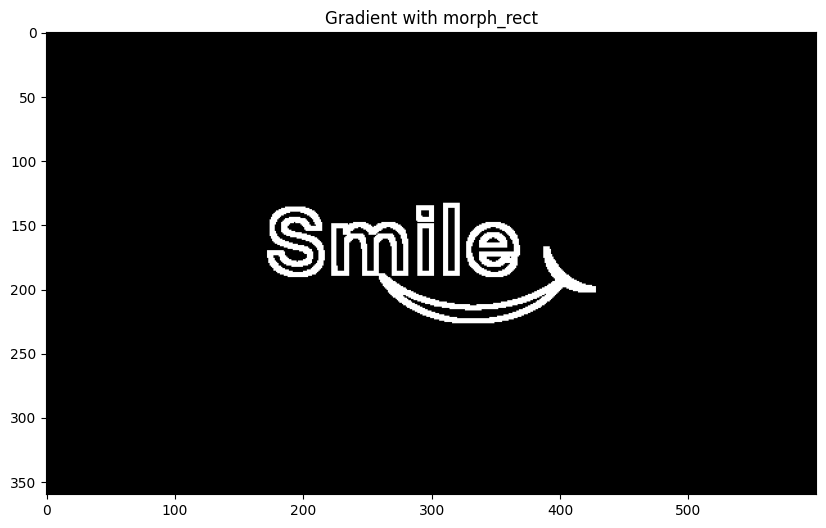

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load and convert image to inverse binary
img = cv2.imread('morphology.png')
ret, binary_img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)

# Create structuring elements
morph_rect = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
morph_ellipse = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
morph_cross = cv2.getStructuringElement(cv2.MORPH_CROSS, (5, 5))

# 1. Display original binary image
plt.figure(figsize=(14, 6))
plt.imshow(binary_img, cmap='gray')
plt.title("Inverse Binary Image")
plt.show()

# 2. Opening with morph_rect (with noise)
white_noise = (np.random.randint(low=0, high=2, size=binary_img.shape) * 255).astype('uint8')
binary_with_noise_img = binary_img + white_noise
opening_img_rect = cv2.morphologyEx(binary_with_noise_img, cv2.MORPH_OPEN, morph_rect)
plt.figure(figsize=(14, 6))
plt.imshow(opening_img_rect, cmap='gray')
plt.title("Opening with morph_rect")
plt.show()

# 3. Opening with morph_ellipse (with noise)
white_noise = (np.random.randint(low=0, high=2, size=binary_img.shape) * 255).astype('uint8')
binary_with_noise_img = binary_img + white_noise
opening_img_ellipse = cv2.morphologyEx(binary_with_noise_img, cv2.MORPH_OPEN, morph_ellipse)
plt.figure(figsize=(14, 6))
plt.imshow(opening_img_ellipse, cmap='gray')
plt.title("Opening with morph_ellipse")
plt.show()

# 4. Closing with morph_rect
closing_img = cv2.morphologyEx(binary_img, cv2.MORPH_CLOSE, morph_rect)
plt.figure(figsize=(14, 6))
plt.imshow(closing_img, cmap='gray')
plt.title("Closing with morph_rect")
plt.show()

# 5. Morphological Gradient with morph_rect
gradient_img = cv2.morphologyEx(binary_img, cv2.MORPH_GRADIENT, morph_rect)
plt.figure(figsize=(14, 6))
plt.imshow(gradient_img, cmap='gray')
plt.title("Gradient with morph_rect")
plt.show()

In [5]:
import cv2
import numpy as np

# Load image and convert to grayscale, then binary
img = cv2.imread("girl.jpg", 0)  # Grayscale
_, binary_img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
kernel = np.ones((5,5), np.uint8)

# Apply erosion to remove small white specks (simulating noise)
eroded = cv2.erode(binary_img, kernel, iterations=1)

# Display
combined = np.hstack((binary_img, eroded))
cv2.imshow("Original Binary vs Eroded (Noise Removal)", combined)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [6]:
import cv2
import numpy as np

img = cv2.imread("girl.jpg", 0)
_, binary_img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
kernel = np.ones((5,5), np.uint8)

# Apply dilation to connect broken parts
dilated = cv2.dilate(binary_img, kernel, iterations=1)

# Display
combined = np.hstack((binary_img, dilated))
cv2.imshow("Original Binary vs Dilated (Connect Parts)", combined)
cv2.waitKey(0)
cv2.destroyAllWindows()



### 1. Erosion - Shrinking Objects
- **Application**: Removing noise from scanned documents (e.g., eliminating small specks or dust particles in scanned handwritten notes).

### 2. Dilation - Growing Objects
- **Application**: Connecting broken text in OCR (e.g., enhancing faded license plates or fragmented characters for better text recognition).

### 3. Opening - Erosion then Dilation
- **Application**: Removing small white noise in medical imaging (e.g., cleaning X-ray images of bones to eliminate speckle artifacts).

### 4. Closing - Dilation then Erosion
- **Application**: Filling gaps in fingerprint analysis (e.g., closing small breaks in fingerprint ridges for improved biometric matching).

### 5. Gradient - Edge Detection
- **Application**: Object outline detection in robotics (e.g., identifying boundaries of objects or people in surveillance feeds for navigation).

### 6. Top Hat - Highlighting Bright Features
- **Application**: Detecting small defects in manufacturing (e.g., spotting tiny bright scratches or imperfections on metal surfaces during quality control).

### 7. Black Hat - Highlighting Dark Features
- **Application**: Detecting cracks in pavement (e.g., identifying small dark cracks or holes in road surfaces for maintenance planning).